### Convolutional Neural Networks for Image Classification

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data from keras datasets
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
# check the shapes
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

- We can see the shape of X_train as (60000, 28, 28) - indicates there are 60000 samples, width of 28 pixels and height of 28 pixels as these represents image data

In [7]:
sample_image = X_train[0]
sample_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
sample_image.max(), sample_image.min()

(255, 0)

- the values in each pixel ranges from 0 to 255
- 0 could represent white and 255 represents black, as the image is in Greyscale
- later on we will need to normalize the data, maybe between 0 and 1 for the model to train easier and faster way
- Also, we will need to reshape the data in say (60000, 28, 28, 28, 1) - last 1 representing the color channels

### Preprocessing Data

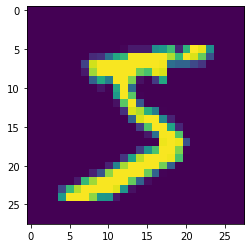

In [9]:
# plotting this sample image
plt.imshow(sample_image)

- We are seeing as color but this is not actully a color image, it is on grey scale only because of this palette, it looks like color image

In [10]:
# check the target data
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

- We can see the target data is listed in integer numeric values
- these values cannot be used as it is as the model will treat these values as a continuous value and will predict accordingly
- We will encode these target values using one-hot encoding using keras

In [11]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

In [12]:
# check the shape of the target 
y_train.shape

(60000,)

In [13]:
# checking an example values after encoding
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

- Now we can see the integer numeric data is now converted into an binary value array of 10 elements 
- for the first sample image, the value is 5, so the index position 5 has 1 indicating 5

In [16]:
# lets encode our target data 
# passing the number of class explicitly
# otherwise model will automatically identify these class if not provided
y_cat_train = to_categorical(y_train, 10)

y_cat_test = to_categorical(y_test, 10)

### Processing Training Data
- We can use scikit learn preprocessing like MinMaxScaler to normalize the data, but we know that the value in a pixel will be between 0 and 255
- So, we can just divide the value by 255, that will basically give a value between 0 and 1 which is what we are looking for

In [19]:
# normalizing the train and test data
X_train = X_train/255
X_test = X_test/255

In [21]:
# check one of a sample
X_train[0].max(), X_train[0].min()

(1.0, 0.0)

In [22]:
scaled_sample_image = X_train[0]

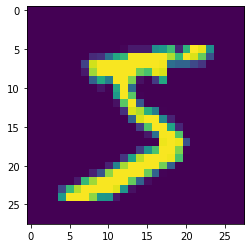

In [23]:
# plot and check the image
plt.imshow(scaled_sample_image)

- There is no change in the original image and the scaled image as we have just only scaled the values and not altering the values

## Reshaping the Data
- Like mentioned before, we will need to reshape the data for the model to handle properly
- Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [27]:
# reshape to include the channel dimension

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [28]:
# check the shape 
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Training/Fitting the model

In [29]:
# import libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Flatten, Conv2D

In [36]:
# initialize the model
model = Sequential()

# add layers
model.add(Conv2D(filters=32,                # number of filter kernels
                 kernel_size=(4,4),         # size of filter kernel
                 strides=(1,1),             # stride -- like in terms of how many pixels to move to cover
                 padding = 'VALID',         # https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t
                 input_shape = (28, 28, 1),    # input shape of the data
                 activation = 'relu'))      # activation function

# add the max pool layer
model.add(MaxPool2D(pool_size=(2,2)))

# flatten the data, before passing to Dense layer
# this will convert 28x28 data into an array containing 784 elements
model.add(Flatten())

# add Dense layer
model.add(Dense(128, activation = 'relu'))

#output layer
model.add(Dense(10, activation='softmax')) # units = 10-> 10 target labels
# normally use softmax for multiclass classification 


# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # for multiclass classification
             metrics=['accuracy']       # additional metrics we can pass that we want to see while training
             )                          # this will get reported in model history

# https://keras.io/metrics/  -- to check all available metrics from keras

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

### Adding Early Stopping

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss', # we can also provide the accuracy as we have provided in the metrics 
                           patience=2)

In [41]:
# training the model
model.fit(X_train,
          y_cat_train,
          epochs=10,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop]
         )

Epoch 1/10
1875/1875 [==============================] - 26s 12ms/step - loss: 0.1352 - accuracy: 0.9601 - val_loss: 0.0658 - val_accuracy: 0.9780
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0415 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0380 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0395 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0392 - val_accuracy: 0.9870


- Model Early Stopped

### Model Evaluation

In [44]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.135226,0.960100,0.065830,0.9780
1,0.047536,0.985317,0.041462,0.9856
2,0.030967,0.989967,0.038042,0.9883
3,0.019938,0.993633,0.039456,0.9873
4,0.015341,0.995167,0.039244,0.9870


- now we can see val_accuracy in the history as we have added as part of the metrics

<AxesSubplot:>

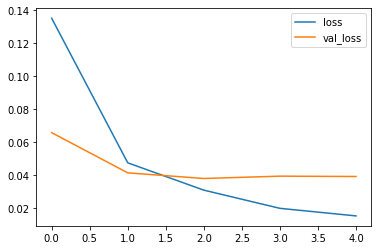

In [46]:
# plot and compare the metrics
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

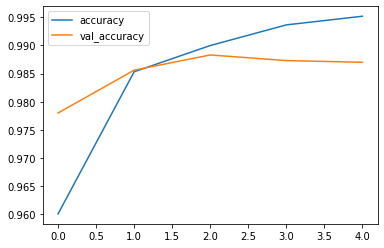

In [47]:
# plot and compare the metrics
metrics[['accuracy', 'val_accuracy']].plot()

- We can the training loss kept reducing but the validation loss kind of remain same for at least 2 epochs, so the early stop was called
- Simlarly in the accuracy metrics also, the training accuracy kind of kept increasing even about to reach 100% but the validation accuracy remains unchanged.

In [48]:
### Check the evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
from tensorflow import keras

In [60]:
# get model predictions
predict_x=model.predict(X_test) 
test_preds=np.argmax(predict_x,axis=1)

313/313 [==============================] - 2s 6ms/step


In [61]:
test_preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [59]:
predict_x[0]

array([4.7316773e-10, 3.6650466e-08, 3.5292400e-09, 1.9205594e-07,
       5.2299297e-11, 3.8421555e-10, 6.0408722e-17, 9.9999976e-01,
       5.2778226e-10, 4.1858201e-09], dtype=float32)

In [62]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [63]:
print(confusion_matrix(y_test, test_preds))

[[ 977    0    0    0    0    0    0    1    2    0]
 [   0 1132    0    0    0    1    1    0    1    0]
 [   1    1 1017    1    0    0    1    5    6    0]
 [   0    0    1 1005    0    2    0    0    2    0]
 [   1    2    1    0  954    0    4    0    5   15]
 [   2    0    0    9    0  874    3    0    3    1]
 [   8    2    0    0    2    1  942    0    3    0]
 [   1    2    3    3    0    0    0 1014    2    3]
 [   2    0    0    2    0    0    0    0  969    1]
 [   1    1    1    0    3    2    0    8    7  986]]


## For new data

In [68]:
new_data = X_test[8]
new_data.max(), new_data.min()

(1.0, 0.0)

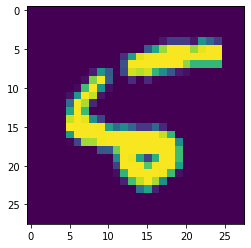

In [70]:
plt.imshow(new_data)

In [73]:
new_data.shape

(28, 28, 1)

- We should reshape new data to match with the input shape that we used to train our model i.e.
- (number of samples, width, height, num_channels)
- for one new data it will be (1, 28, 28, 1)

In [74]:
# reshape new data
new_data = new_data.reshape(1,28,28,1)

In [75]:
# predict using the model
np.argmax(model.predict(new_data), axis = 1)

1/1 [==============================] - 0s 150ms/step


array([5], dtype=int64)

In [76]:
# true value
y_test[8]

5